In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random

In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [214]:
names = []
ns1 = 36
shift1 = 36
for i in range(shift1,ns1):
    names = pd.read_csv("./data/wave_equation/data"+str(i)+"/name_of_file") 
    #print(names[i].name.size)
    
ns = 16
shift = 15
for i in range(shift,ns):
    names = pd.read_csv("./data/log_comp/data"+str(i)+"/name_of_file") 
# wave eq. radiative bound for PI, no bound for PI.
#  no dissipation
# step 200
#time 20
#data0 dx=0.1
#data1 dx=0.05
#data2 dx=0.01
#data3 dx=0.05 -> ad hoc ghost extr.

#int_time=20
#spherical wave eq
#data4 dx=0.05  2 ord ghost_extr
#data5 dx=0.05 6 ord ghost extr spherical simm
#data6 "..." 4 ord ghost extr sherical simm
#data7 dx=0.01 4 ord ghost extr sherical simm
#data8 "dx = 0.05                " + art diss eps=0.02
#data9 "..." eps=0.01
#data10 eps=0.03
#data11 eps=0.0005
#data12 eps=0.0001
#data13 dx=0.005, 4 ord gp extr, no diss
#data14 dx=0.05 epsilom=0.025
#data15 eps=0.04
#data16 eps=0.05
#data17 eps=0.075
#data18 eps=0.1

#dx=0.01
#data19 = data7 but the runtime is 40 (before was 20)
#data20 "..." Husa art diss eps=0.02
#data21 = ... , eps=0.05
#data22= ... eps=0.01
#data23= ... eps=0.0075
#data24= ... eps=0.015
#data25= ... eps=0.0125
#data26      eps=0.009
#data27      eps=?
#data28      eps=?
#data29      
#data30 dx=0.005 eps= 0.0075

# for comparison with model 1, spherical symmetrical wave equation
#data31 dx=0.05, time_int = 10, step to save=250, eps=0
#data32 dx=0.05 time_int=10, step to save = 250, eps=0, initial Phi=null,initial PI =exp(x^2) * a, a=2
#data33 is data 32 wih dx=0.01 + art diss: eps=0.02
#data34 amplitude=10, dx=0.01, t=10, step=250, initial PI =-exp(x^2) * a, a=2 -> divergence!

# here something wrong was happening
#model1
#data0 dx=0.05, ampl=1
#data1  ampl=2
#data2 amol=5
#data3 ampl=20
#data4 ampl=50

# here we use
#dx=0.01
#focus on the beginning of the evolution
#data5 (data34) but we have model1_PI instead of spherical_wave_eq -> divergence, good correspondence with data 34!
#data6 is data 5 but amplitude = 5
#data7 dx =0.01, t=10, step=250, eps=0, amplitude=10

#new stocking method
#data8
names.names


0    ./data/log_comp/data15/hyp_slice_ampl_1.340000...
Name: names, dtype: object

In [215]:
range_time = 0.8
number_steps = 200
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step,len_step)
times

array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
       0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
       0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
       0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
       0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
       0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  , 0.204, 0.208, 0.212,
       0.216, 0.22 , 0.224, 0.228, 0.232, 0.236, 0.24 , 0.244, 0.248,
       0.252, 0.256, 0.26 , 0.264, 0.268, 0.272, 0.276, 0.28 , 0.284,
       0.288, 0.292, 0.296, 0.3  , 0.304, 0.308, 0.312, 0.316, 0.32 ,
       0.324, 0.328, 0.332, 0.336, 0.34 , 0.344, 0.348, 0.352, 0.356,
       0.36 , 0.364, 0.368, 0.372, 0.376, 0.38 , 0.384, 0.388, 0.392,
       0.396, 0.4  , 0.404, 0.408, 0.412, 0.416, 0.42 , 0.424, 0.428,
       0.432, 0.436, 0.44 , 0.444, 0.448, 0.452, 0.456, 0.46 , 0.464,
       0.468, 0.472, 0.476, 0.48 , 0.484, 0.488, 0.492, 0.496, 0.5  ,
       0.504, 0.508,

In [216]:

big_DF = []
for n in range(0,ns1-shift1):
    # read the datas and put them in a Panda's database 
    DF1 = []
    for i in range(0,int(names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF1.append(df)

    DF2 = []
    for i in range(int(names[n].name.size/3),int(2*names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF2.append(df)

    DF3 = []
    for i in range(int(2*names[n].name.size/3),int(names[n].name.size)):
        df = pd.read_csv(names[n].name[i])
        DF3.append(df)
    DF = [DF1,DF2,DF3]
    #print(DF1[0].size)
    #print(DF2[0].size)
    #print(DF3[0].size)
    print("data"+str(n+shift1)+" added")
    big_DF.append(DF)

for n in range(ns1-shift1,ns-shift+(ns1-shift1)):
    # read the datas and put them in a Panda's database 
    DF1 = []
    for i in range(0,int(names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF1.append(df)

    DF2 = []
    for i in range(int(names[n].name.size/3),int(2*names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF2.append(df)

    DF3 = []
    for i in range(int(2*names[n].name.size/3),int(names[n].name.size)):
        df = pd.read_csv(names[n].name[i])
        DF3.append(df)
    DF = [DF1,DF2,DF3]
    #print(DF1[0].size)
    #print(DF2[0].size)
    #print(DF3[0].size)
    print("data"+str(n+shift)+" added")
    big_DF.append(DF)


KeyError: 0

In [217]:
names.names

0    ./data/log_comp/data15/hyp_slice_ampl_1.340000...
Name: names, dtype: object

In [244]:
%%time
domain = 5
h1 = 0.1
h2 = h1/2
h3 = h2/2
N_point1 = int(domain/h1+1)
N_point2 = int(domain/h2+1)
N_point3 = int(domain/h3+1)
big_DF = []
for n in range (0, 1):
    DF1, DF2, DF3 = [], [], []
    for i in range (0,number_steps):
        DF1.append( pd.read_csv(names.names[n],skiprows = (N_point1+1)*i,nrows =N_point1) )
        DF2.append( pd.read_csv(names.names[n],skiprows = (N_point1+1)*(number_steps+1)+ (N_point2+1)*i,nrows =N_point2) )
        DF3.append( pd.read_csv(names.names[n],skiprows = (N_point1+1)*(number_steps+1)+ N_point1*2*(number_steps+1)+(N_point3+1)*i,nrows =N_point3) )
    big_DF.append([DF1,DF2,DF3])
    print(names.names[n]+ " added")
        #f[11


./data/log_comp/data15/hyp_slice_ampl_1.340000_dx_0.100000.csv added
CPU times: user 1.97 s, sys: 90 ms, total: 2.06 s
Wall time: 2.06 s


In [237]:
# big_Df index:
# big_DF[run][dx][time]
big_DF[0][0][2]

,x,field0,field1
0,0.0,1.351880e+00,-4.978560e-01
1,0.1,1.162570e+00,7.965590e-02
2,0.2,1.126820e+00,1.216150e-01
3,0.3,9.324350e-01,1.651460e-01
4,0.4,7.177020e-01,1.668380e-01
5,0.5,5.119050e-01,1.464330e-01
6,0.6,3.388670e-01,1.142610e-01
7,0.7,2.082420e-01,8.035980e-02
8,0.8,1.188330e-01,5.135470e-02
9,0.9,6.299280e-02,2.998400e-02


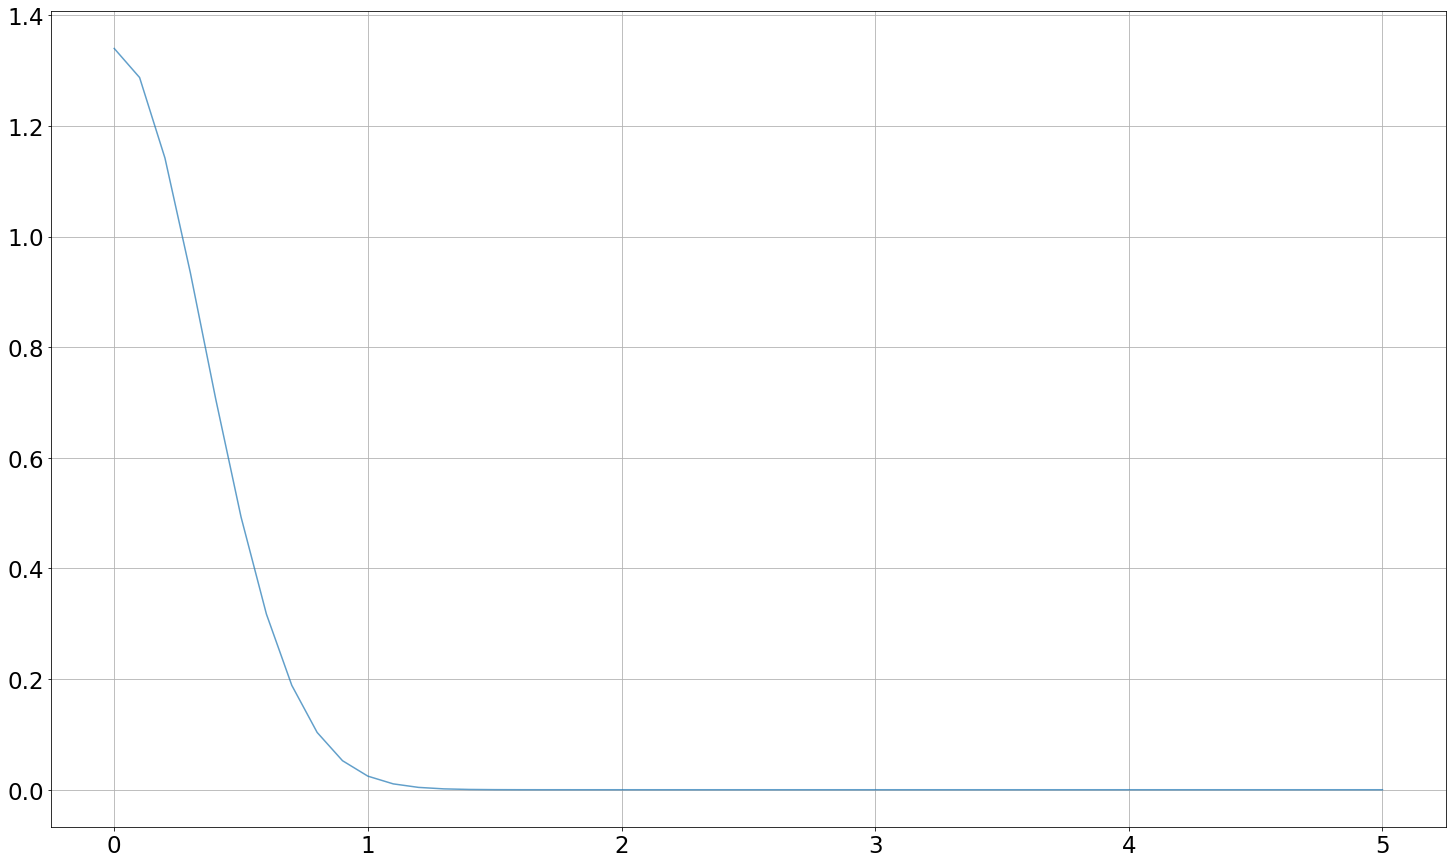

In [238]:
for n in range(0,1):
    for i in range(0,1):
        #plt.plot(DF[i][1]['x'],initialize_func_vect(gauss_PI,DF[i][1]['x'],DF[i][1]['x'][1]-DF[i][1]['x'][1],times[1]),'+',alpha=0.7,label="theo",markersize=15)
        plt.plot(big_DF[n][i][-1]['x'],big_DF[n][i][0]['field0'],alpha=0.7,markersize=25)
        #plt.plot(DF[i][-1]['x'],DF[i][0]['field1']-initialize_func_vect(gauss_PI,DF[i][10]['x'],DF[i][10]['x'][10]-DF[i][10]['x'][10],times[-1]),alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)


    #plt.plot(DF[-1][-1]['x'],(DF[-1][-1]['x']*0+times[-1])*4,'.',alpha=0.4,label='theoretical',markersize=15)
    #plt.plot(DF[-1][-1]['x'],2*(DF[-1][-1]['x'])**2+2*times[-1]**2,'.',alpha=0.4,label='theoretical',markersize=15)

#plt.legend()
plt.grid()
#plt.xlim([0, 4])
#plt.ylim([-0.00001, 0.00001])

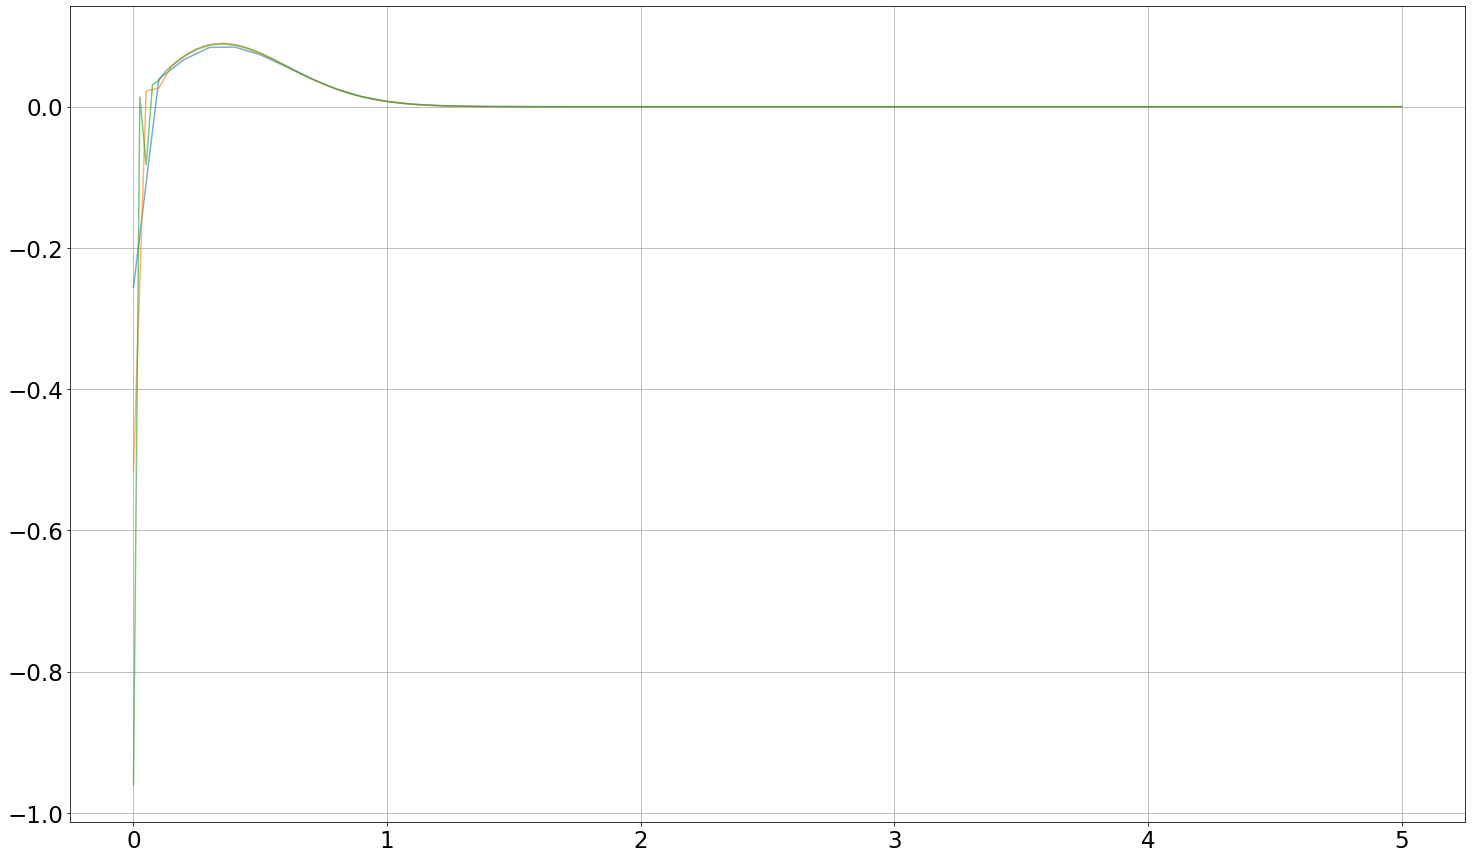

In [245]:
""""
for i in range(0,0):
        for j in range(39,40):
            plt.plot(big_DF[0][i][j]['x'],big_DF[0][i][j]['field0'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field1'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field2'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],initialize_func_vect(gauss_PI,DF[i][0]['x'],DF[i][0]['x'][0]-DF[i][0]['x'][10],times[j]),'.-',alpha=0.6,label="theo",markersize=5)
"""
for n in []:
    for i in range(2,3):
        for j in range(0,4):
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field2'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],initialize_func_vect(gauss_PI,DF[i][0]['x'],DF[i][0]['x'][0]-DF[i][0]['x'][10],times[j]),'.-',alpha=0.6,label="theo",markersize=5)
            #plt.plot(big_DF[n][i][j]['x'],+big_DF[n][i][j]['field0']/(1-big_DF[n][i][j]['field2']),'+-',alpha=0.3,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            plt.plot(big_DF[n][i][j]['x'],np.log(1+big_DF[n][i][j]['field2']),alpha=0.5,markersize=10)
            #plt.plot(big_DF[n][i][j]['x'],np.sin(np.log(1+big_DF[n][i][j]['field2'])),'.-',alpha=0.5,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=10)

            
for n in [0]:
    for i in range(0,3):
        for j in range(1,2):
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],alpha=0.6,markersize=15)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],'+-',alpha=0.4,markersize=8)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],'+-',alpha=0.4,markersize=8)
            
            
plt.grid()
#plt.xlim([-0.1,0.5])
#plt.ylim([ -10,10] )
#plt.legend()
#times[163]

In [228]:
# conv_test_vect = []
for i,t in enumerate(times):
    conv_test_vect.append(conv_test(DF2[i],DF3[i],gauss_PI,t))
#print(conv_test_vect)
plt.plot(times,conv_test_vect)
#plt.xlim(40,80)
#plt.ylim(1.8,2.2)
#plt.vlines(47,2,0,alpha=0.2)
plt.grid()


NameError: name 'conv_test_vect' is not defined

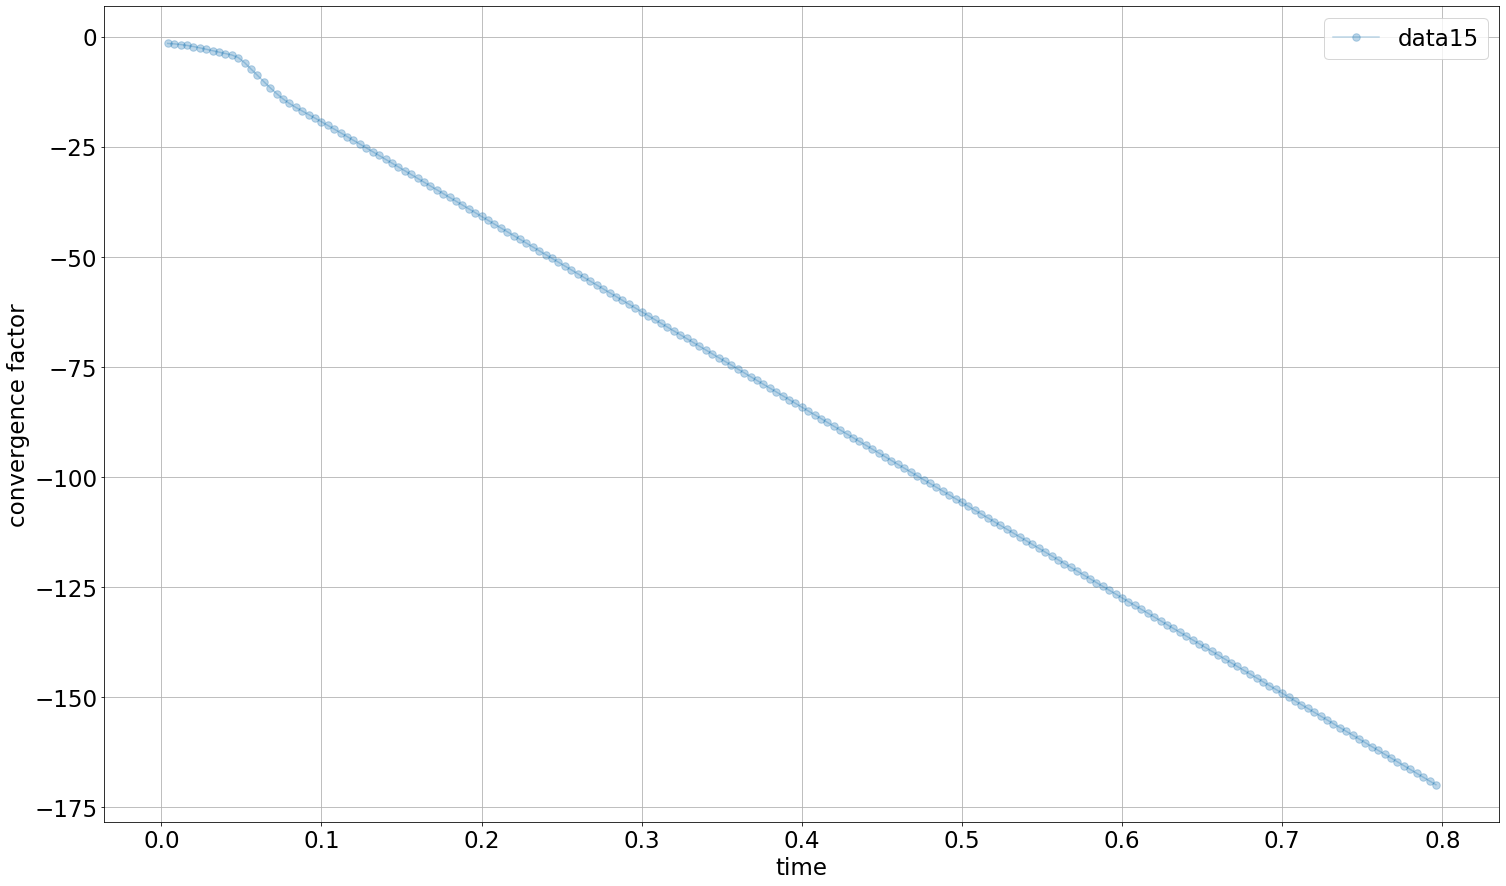

In [200]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
"""
for i,t in enumerate(times[::2]):
        self_conv_test_vect.append(self_conv_test(big_DF[0][0][i],big_DF[0][1][i],big_DF[0][2][i]))
        allruns_self_conv_test_vect.append(self_conv_test_vect)
#plt.plot(times[::2], self_conv_test_vect,markersize=10,alpha=0.5,label=label_vector[0])
"""
for n in range(0,1):
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append(self_conv_test(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i]))
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=15,alpha=0.3,label="data"+str(n+shift))
#plt.xlim(0,40)
#plt.ylim(0,4)
#plt.xlabel('time')
plt.ylabel('convergence factor')
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
plt.grid()
plt.legend()


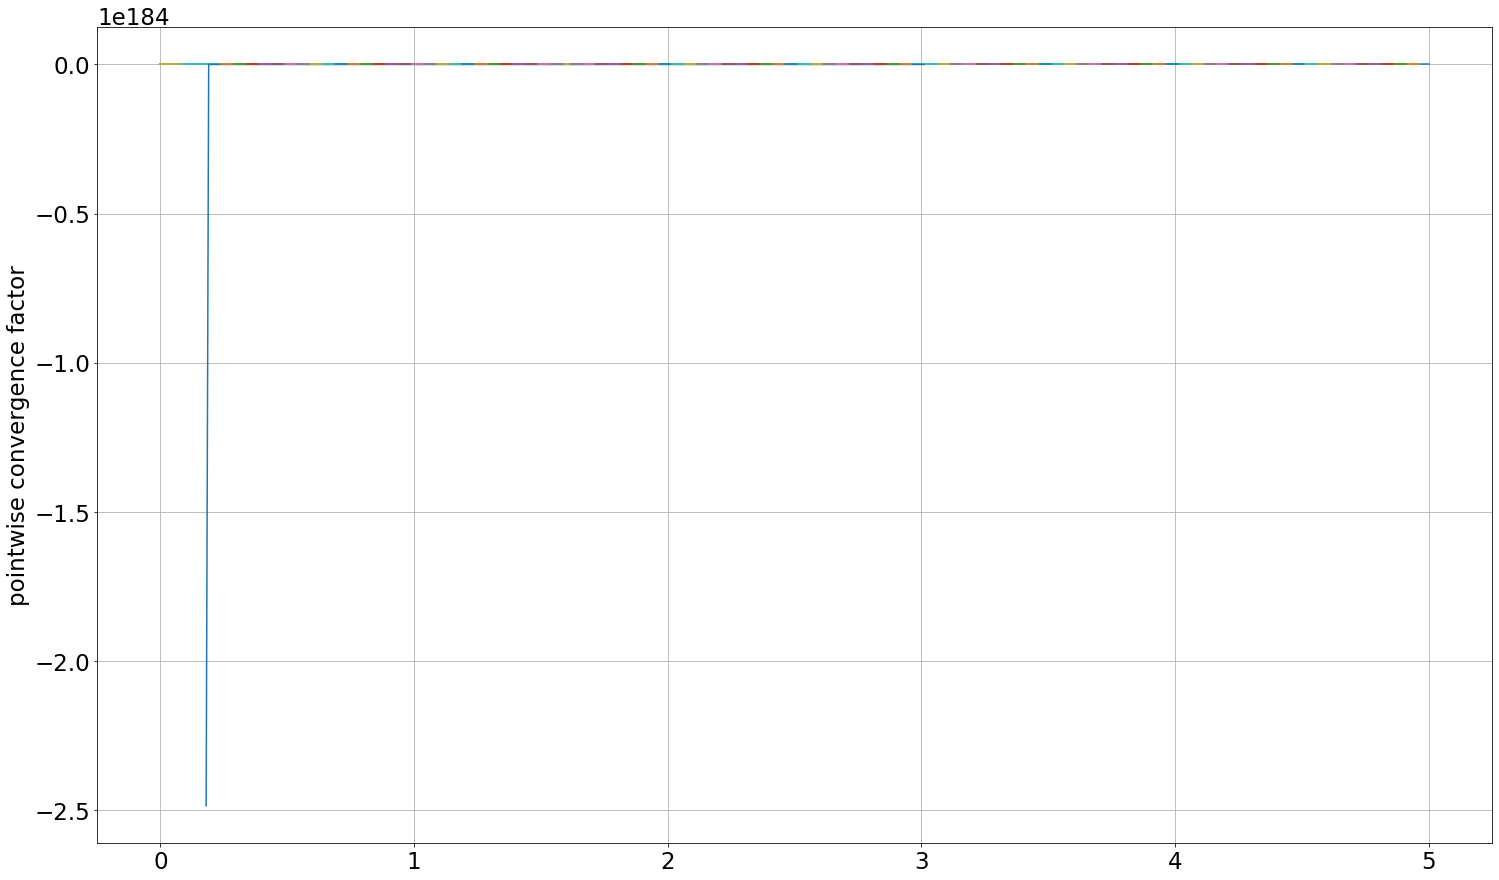

In [219]:
n_ind = 0
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j]))
    plt.plot(big_DF[n_ind][0][0]['x'],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
plt.ylabel('pointwise convergence factor')
plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

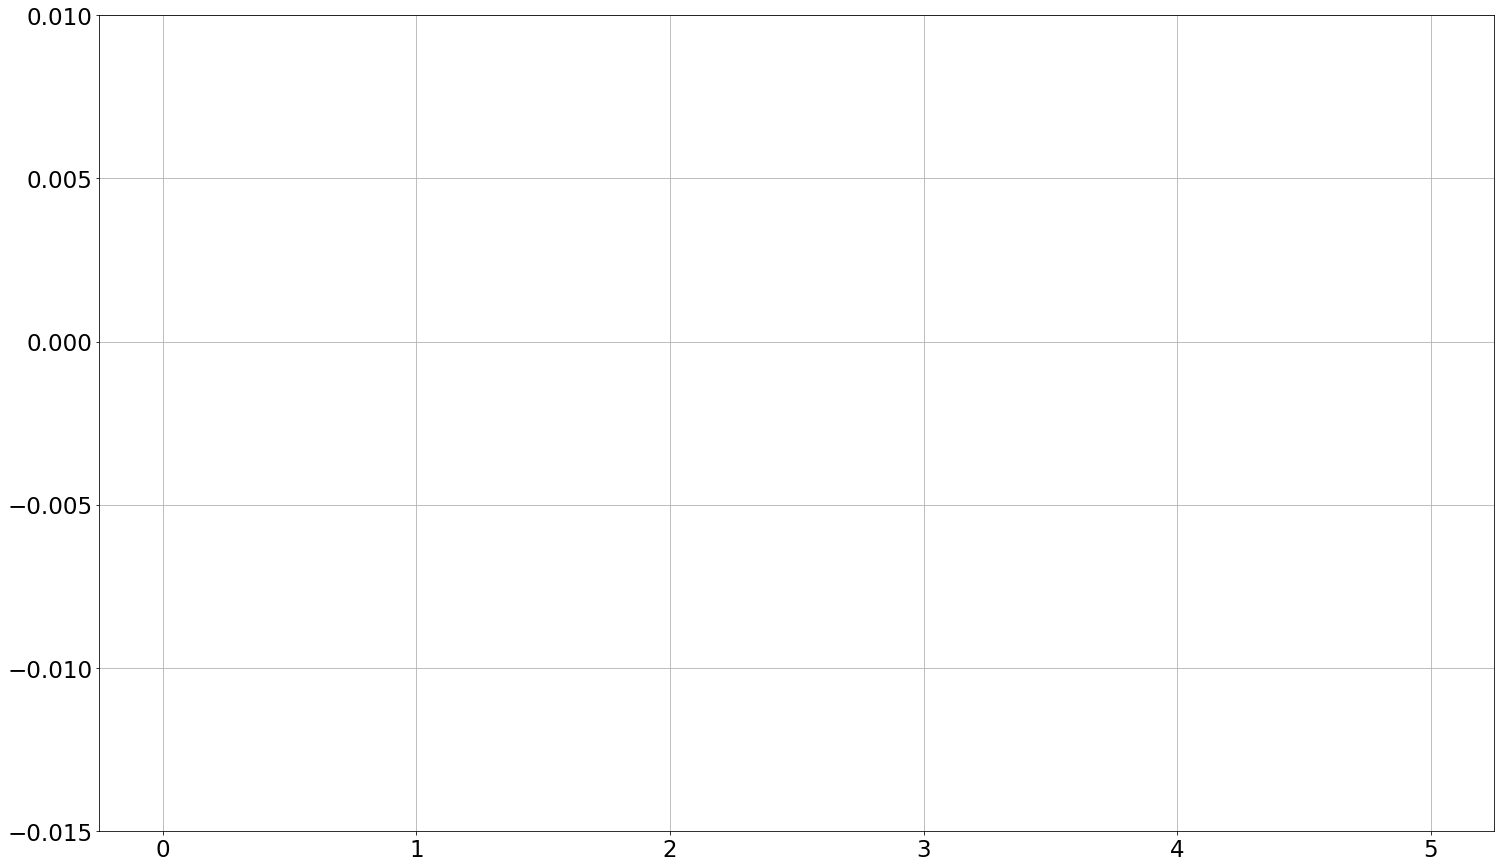

In [162]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'], self_conv_test_vect_pw[1][0]-self_conv_test_vect_pw[1][1],'-.')
#line2, = ax.plot(DF[0][1]['x'], self_conv_test_vect_pw[1][1],'.')
plt.grid()
plt.ylim(-0.015,0.01)


def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0]-self_conv_test_vect_pw[i][1])  # update the data.
    return line1,

#def animate2(i):
#    line2.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
#    return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save("pw_conv.mp4")



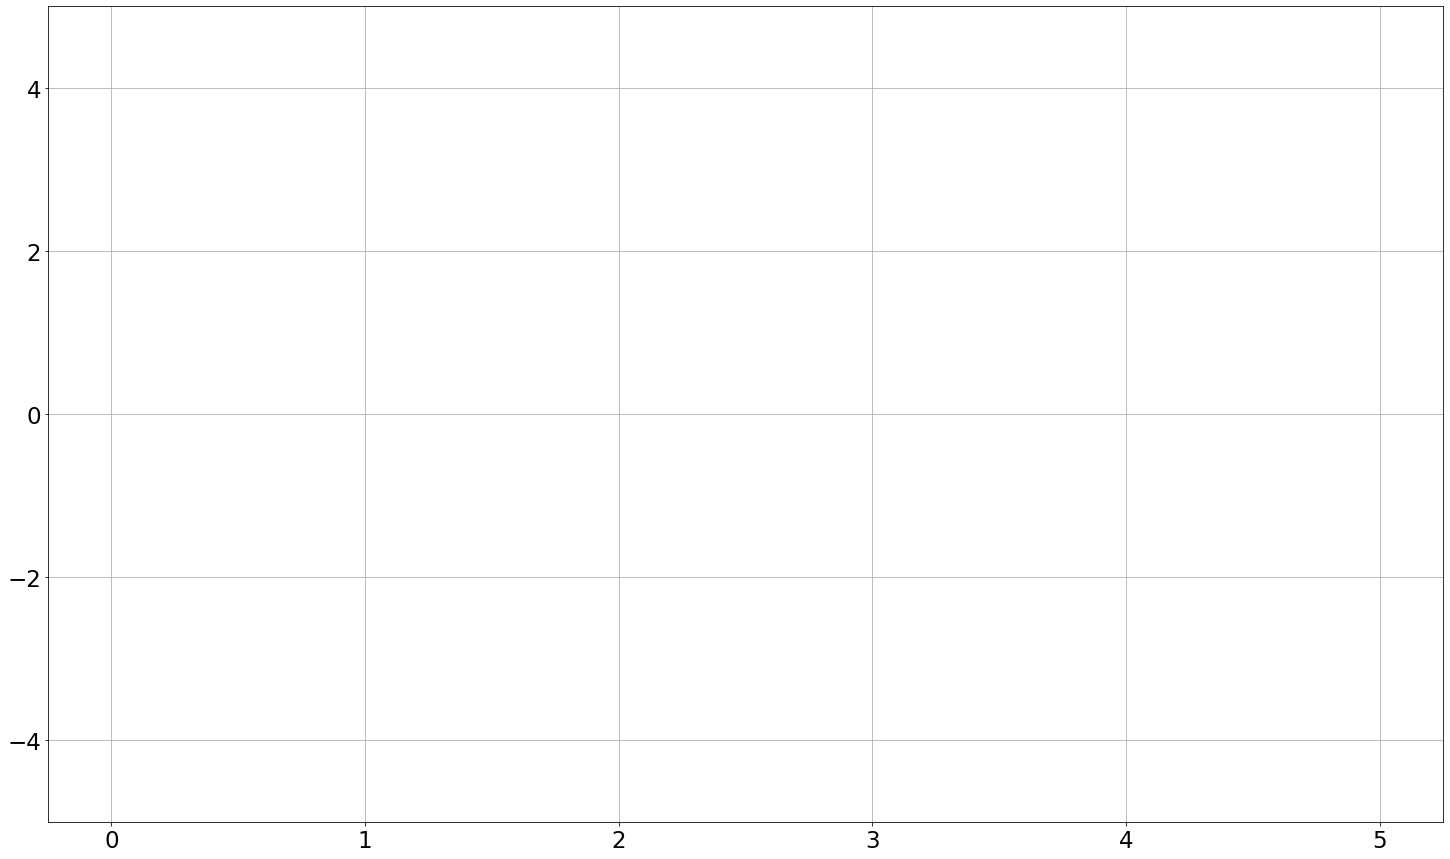

In [77]:
fig, ax = plt.subplots()
field = 0
n_ind = 0
big_DF_ind = 0
data_name = "./data/log_comp/data15/field"+str(field)+".mp4"
line, = ax.plot(big_DF[big_DF_ind][0][0]['x'], big_DF[big_DF_ind][0][0]['field'+str(field)])
plt.ylim(-5,5)
#plt.xlim(-5,0)
plt.grid()

def animate(i):
    #line.set_xdata(DF[0][i]['x'])
    line.set_ydata(big_DF[big_DF_ind][0][i]['field'+str(field)])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=number_steps-1)
ani.save(data_name)



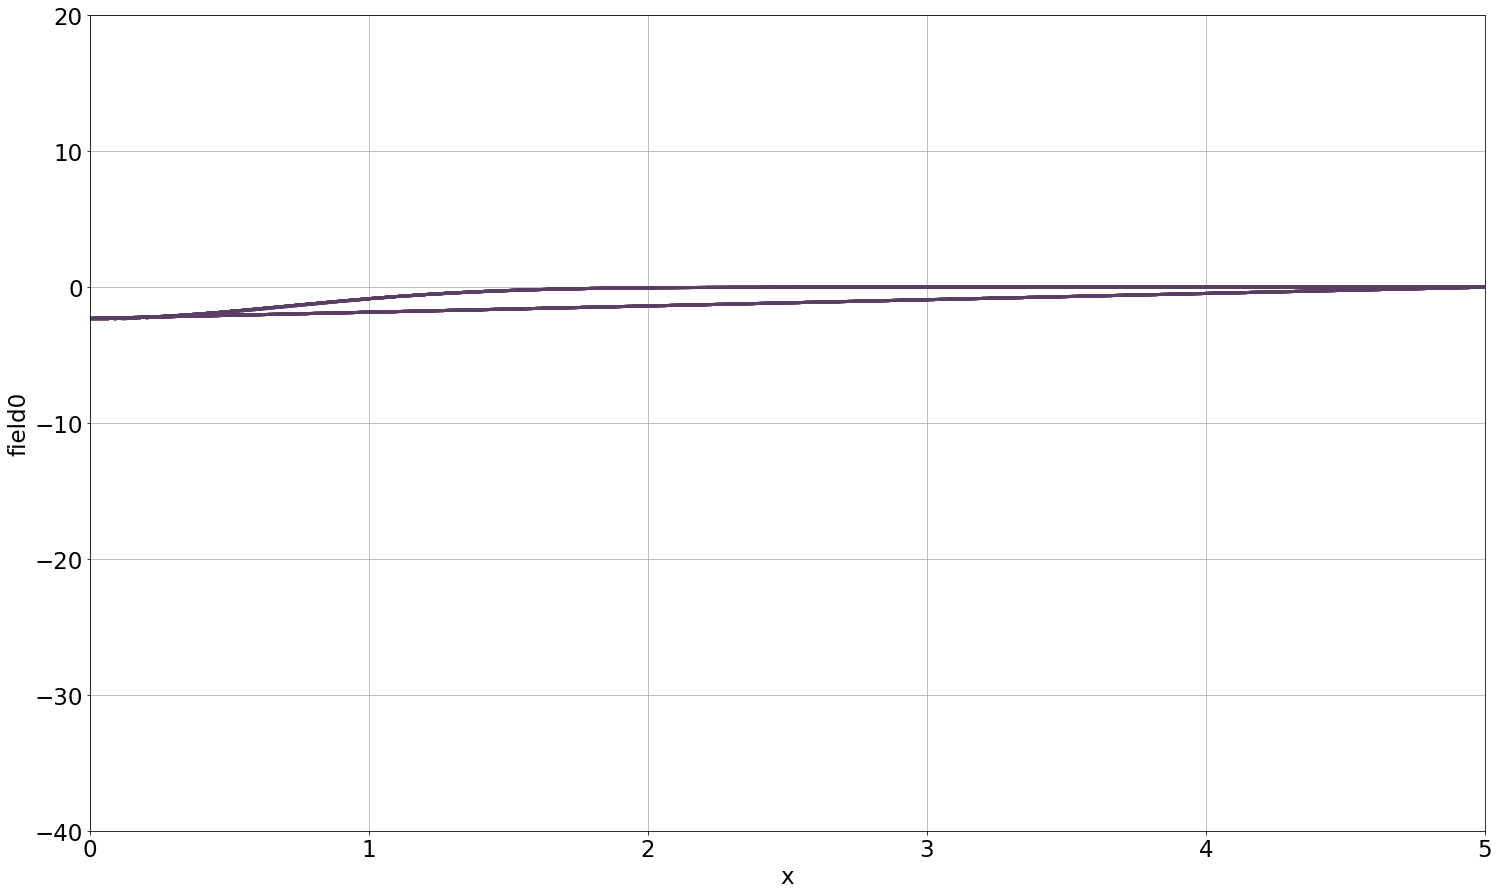

In [125]:
fig = plt.figure()
ax1 = plt.axes(ylim=(-40,20),xlim=(0,5))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('field0')
plotlays, plotcols = [7], ["blue","darkred","cadetblue","olive","plum","orange","navy"]
lines = []
for index in range(7):
    lobj = ax1.plot([],[],'-.',lw=3,color=plotcols[index],alpha=0.6)[0]
    lines.append(lobj)

    
x1,y1 = [big_DF[0][0][0]['x']],[ big_DF[0][0][0]['field0']]
x2,y2 = [big_DF[1][0][0]['x']],[ big_DF[1][0][0]['field0']]
x3,y3 = [big_DF[2][0][0]['x']],[ big_DF[1][0][0]['field0']]
x4,y4 = [big_DF[3][0][0]['x']],[ big_DF[1][0][0]['field0']]
x5,y5 = [big_DF[4][0][0]['x']],[ big_DF[1][0][0]['field0']]
x6,y6 = [big_DF[5][0][0]['x']],[ big_DF[1][0][0]['field0']]
x7,y7 = [big_DF[6][0][0]['x']],[ big_DF[1][0][0]['field0']]


def init():
    for line in lines:
        line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):

    x1 = big_DF[0][0][0]['x']
    y1 = big_DF[0][0][i]['field0']
    #x1.append(x)
    #y1.append(y)

    x2 = big_DF[1][0][0]['x']
    y2 = big_DF[1][0][i]['field0']
    #x2.append(x)
    #y2.append(y)
    
    x3 = big_DF[2][0][0]['x']
    y3 = big_DF[2][0][i]['field0']
    
    x4 = big_DF[3][0][0]['x']
    y4 = big_DF[3][0][i]['field0']
    
    x5 = big_DF[4][0][0]['x']
    y5 = big_DF[4][0][i]['field0']
    
    x6 = big_DF[5][0][0]['x']
    y6 = big_DF[5][0][i]['field0']
    
    x7 = big_DF[6][0][0]['x']
    y7 = big_DF[6][0][i]['field0']

    xlist = [x1,x2,x3,x4,x5,x6,x7]
    ylist = [y1, y2,y3,y4,y5,y6,y7]

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=number_steps-1, interval=50, blit=True)

plt.grid()
plt.show()
anim.save("fields.mp4")